In [1]:
import pandas as pd
import numpy as np

In [20]:
from pathlib import Path
data = pd.read_csv(Path("data") / "air_passengers.csv")
data.head(10)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
data.tail(10)

,Month,#Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


** Data Range


In [8]:
pd.date_range("1953-01", periods=7, freq='MS')


DatetimeIndex(['1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01'],
              dtype='datetime64[ns]', freq='MS')

The most common are "D" for daily, "W” for weekly, "M” for month end date, "MS” for month start, and many others that can be found [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases).

In [9]:
# Setting a seed for reproductionability
np.random.seed(12)
# Create dataset
df = pd.DataFrame({
 'date': pd.date_range("2022-01-01", periods=180, freq='D'),
 'sales': np.random.randint(1000, 10000, size=180)})
 # Set index
df = df.set_index('date')

In [10]:
df.head()

,sales
date,
2022-01-01,6787
2022-01-02,4325
2022-01-03,8409
2022-01-04,4714
2022-01-05,1278


##Resample

The first interesting function is the resample. What it does is to take in a dataset or a series (a column) and it aggregates the data according to the rule provided as argument. It is kind of a group by function by date.

In [12]:
df.resample(rule="MS").mean()

,sales
date,
2022-01-01,5721.000000
2022-02-01,5227.964286
2022-03-01,4333.064516
2022-04-01,5198.400000
2022-05-01,5697.322581
2022-06-01,6574.103448


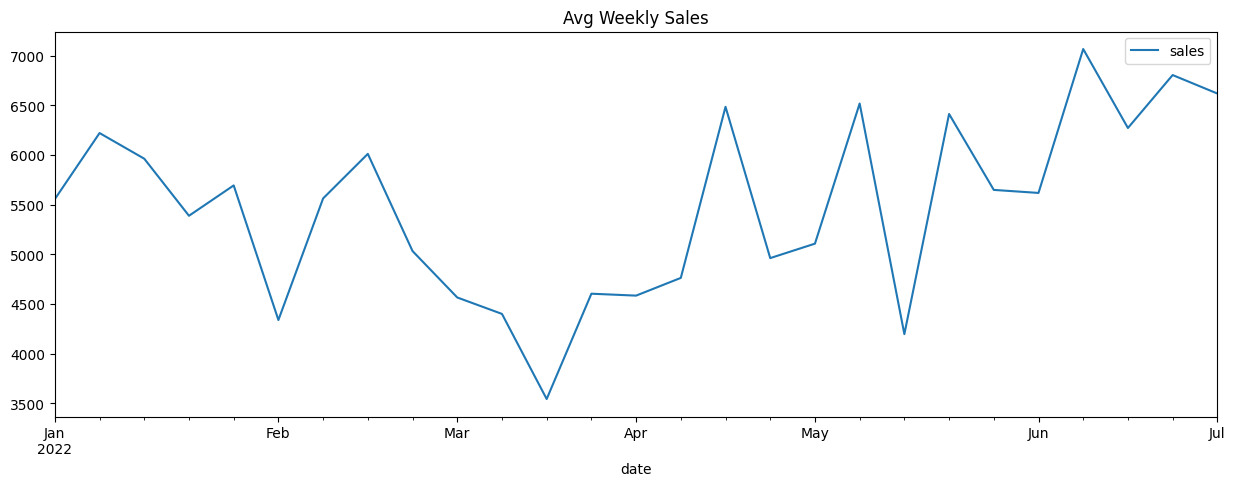

In [13]:
# Resample plot
df.resample('W').mean().plot(figsize=(15,5), title='Avg Weekly Sales');

**Shift


The shift function in Pandas is for you to move data up or down in a column. Let’s say we want to compare the sales on side-by-side columns from the current day with the last one () and current day versus following week sales (). Here is how it can be done using shift.

In [15]:
# Create a copy of the data
df_shift = df.copy()
#Shift one day up
df_shift['next_day_sales'] = df_shift.sales.shift(-1)
#Shift one week up
df_shift['next_week_sales'] = df_shift.sales.shift(-7)
df_shift.head()

,sales,next_day_sales,next_week_sales
date,,,
2022-01-01,6787,4325.0,5569.0
2022-01-02,4325,8409.0,9610.0
2022-01-03,8409,4714.0,9651.0
2022-01-04,4714,1278.0,6194.0
2022-01-05,1278,9241.0,2128.0


In [17]:
# Obviously, we can create the differences between those columns if wanted.
# Net gain/loss week over week
df_shift['one_week_net'] = df_shift.sales - df_shift.sales.shift(-7)
df_shift.head()

,sales,next_day_sales,next_week_sales,one_week_net
date,,,,
2022-01-01,6787,4325.0,5569.0,1218.0
2022-01-02,4325,8409.0,9610.0,-5285.0
2022-01-03,8409,4714.0,9651.0,-1242.0
2022-01-04,4714,1278.0,6194.0,-1480.0
2022-01-05,1278,9241.0,2128.0,-850.0


** Rolling Average


The next function is a tool commonly used by people who work in the stock trading business, the rolling average. In fact, this function is can be used in combination with others, not only mean, but it just happen to be the most common.



In [18]:
df.rolling(2).mean()

,sales
date,
2022-01-01,NaN
2022-01-02,5556.0
2022-01-03,6367.0
2022-01-04,6561.5
2022-01-05,2996.0
...,...
2022-06-25,3666.5
2022-06-26,5569.5
2022-06-27,5263.5


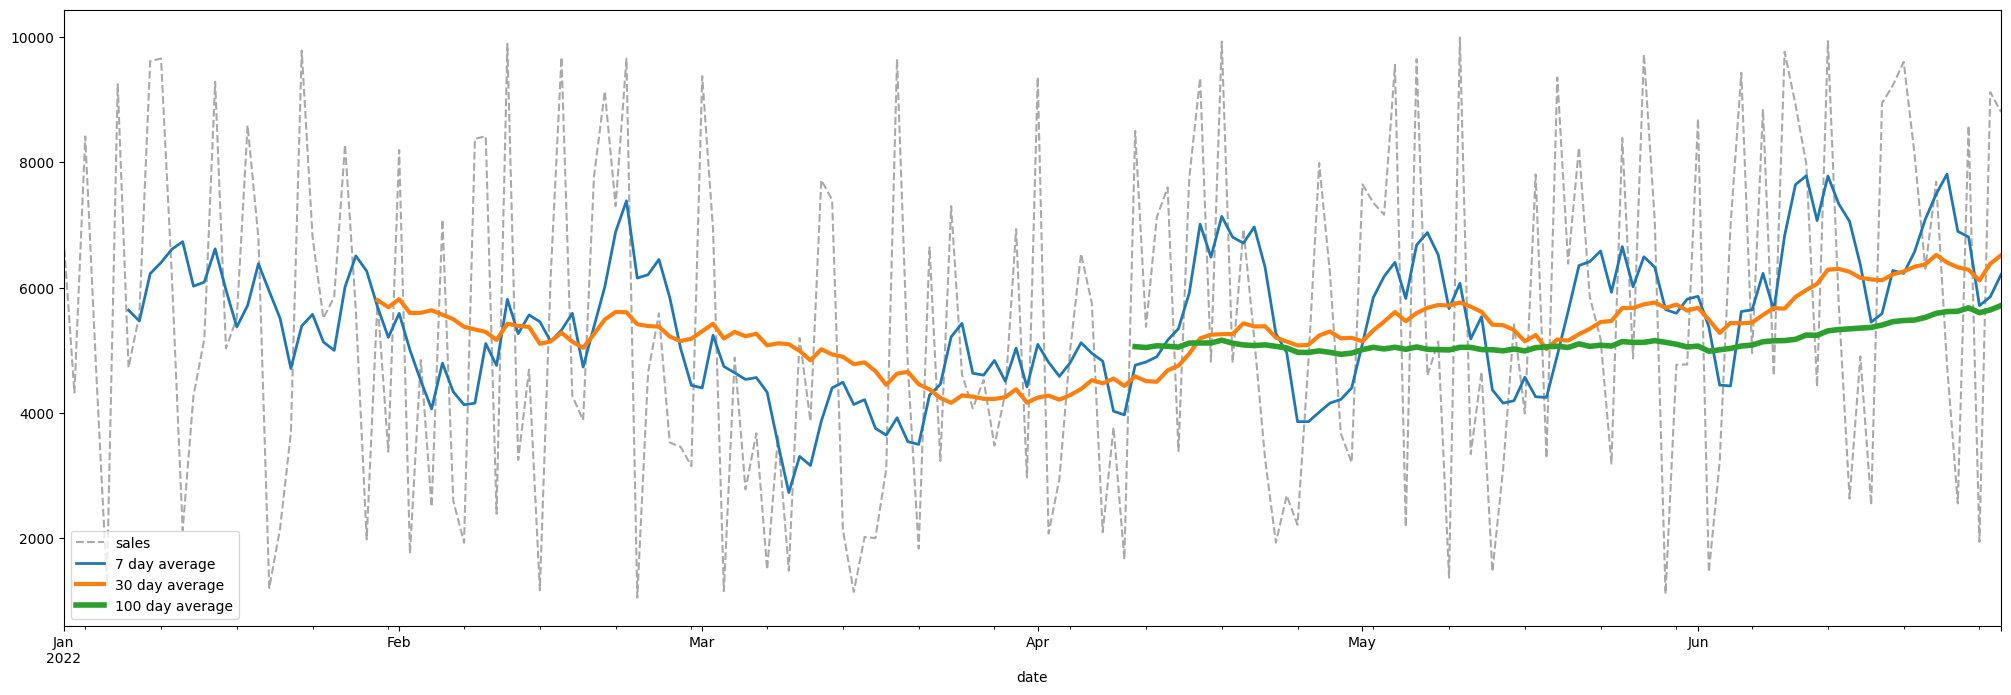

In [19]:
# Rolling plot
df.sales.plot(figsize=(25,8), legend=True, linestyle='--', color='darkgray')
df.rolling(window=7).sales.mean().plot(legend=True, label='7 day average', linewidth=2)
df.rolling(30).sales.mean().plot(legend=True, label='30 day average', linewidth=3)
df.rolling(100).sales.mean().plot(legend=True, label='100 day average', linewidth=4);# Rolling plot
